<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

DOWNLOADING AND IMPORTING DATASET

In [5]:
!kaggle datasets download -d emoneyanalytics/unbalancedrisk

  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 36.2MB/s]


In [0]:
data_risk = pd.read_csv('unbalancedrisk.zip', compression='zip', header=0, sep=',', quotechar='"', encoding = "utf-8")

PRINTING DATASETS

In [7]:
print(data_risk)

        id  f1        f2  f3   f4  ...   f31         f32    f33      f34  obj1
0        1   1   17.2131   1  1.0  ...  13.0   32.766370    NaN      NaN     0
1        2  35    0.1747   1  1.0  ...  23.0  210.567669    NaN      NaN     0
2        3   1   35.3943   1  NaN  ...  16.0    0.000111    NaN      NaN     1
3        4   1    4.4873   1  1.0  ...   7.0    9.380889    NaN      NaN     0
4        5   1       NaN   1  NaN  ...  20.0   28.089135    NaN      NaN     0
...    ...  ..       ...  ..  ...  ...   ...         ...    ...      ...   ...
4523  4524  29    5.7576   1  1.0  ...  32.0  236.170700    NaN  63.0541     0
4524  4525   2  107.7430   1  1.0  ...  27.0    2.799800    NaN      NaN     1
4525  4526   1    1.9364   1  1.0  ...   NaN  205.806400    NaN  15.9357     1
4526  4527   1    7.6795   1  3.0  ...  10.0    1.658700  533.0      NaN     0
4527  4528   1   80.0871   1  1.0  ...   NaN    2.980200    NaN      NaN     1

[4528 rows x 36 columns]


DISPLAY AMOUNT OF ROWS EACH CLASS HAS, AND IMBALANCE OF DATASET

In [8]:
print(data_risk['obj1'].value_counts())
print("Imbalance:", data_risk['obj1'].value_counts()[0]/sum(data_risk.obj1.value_counts()))

0    3694
1     834
Name: obj1, dtype: int64
Imbalance: 0.8158127208480566


BASE RESULTS

In [0]:
#Create decision tree and random forest classifiers
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
#Retrieves a classifier, features and labels to perform cross-validation and display results
def evaluatePerformance(clf, features, labels):
  a = cross_val_score(tree_clf, features, labels, cv=10, scoring='accuracy')
  p = cross_val_score(tree_clf, features, labels, cv=10, scoring='precision')
  r = cross_val_score(tree_clf, features, labels, cv=10, scoring='recall')
  f = cross_val_score(tree_clf, features, labels, cv=10, scoring='f1')

  print("Accuracy:", a.mean(), "+/-", a.std())
  print("Precision:", p.mean(), "+/-", p.std())
  print("Recall:", r.mean(), "+/-", r.std())
  print("F1-Score:", f.mean(), "+/-", f.std())

In [11]:
#Risk dataset base scores DT
feat_risk = data_risk.drop('obj1', axis=1)
for col in feat_risk.columns:
  if feat_risk[col].isnull().any():
    feat_risk[col] = feat_risk[col].fillna(feat_risk[col].median())
feat_risk = np.array(feat_risk)
lab_risk = np.array(data_risk['obj1'])
evaluatePerformance(tree_clf, feat_risk, lab_risk)

Accuracy: 0.5392003164742425 +/- 0.18049456780350026
Precision: 0.16305450371332567 +/- 0.04869932183168757
Recall: 0.32172977624784854 +/- 0.2300489757520311
F1-Score: 0.1982397011891827 +/- 0.05041986856758319


In [12]:
#Risk dataset base scores RF
evaluatePerformance(rf_clf, feat_risk, lab_risk)

Accuracy: 0.5392003164742425 +/- 0.18049456780350026
Precision: 0.16305450371332567 +/- 0.04869932183168757
Recall: 0.32172977624784854 +/- 0.2300489757520311
F1-Score: 0.1982397011891827 +/- 0.05041986856758319


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [13]:
#Downsample RISK DATASET to get 50%
data_risk_ind_ = data_risk[data_risk['obj1'] == 0].index
r_to_del = data_risk_ind_[0:int(len(data_risk_ind_)*0.774)]
data_risk_test = data_risk.drop(index=r_to_del)

print(data_risk_test['obj1'].value_counts())
print("Imbalance:", data_risk_test['obj1'].value_counts()[0]/(data_risk_test['obj1'].value_counts()[1]+(data_risk_test['obj1'].value_counts()[0])))

0    835
1    834
Name: obj1, dtype: int64
Imbalance: 0.5002995805871779


In [14]:
#Risk dataset downsampled scores DT
feat_risk_test = data_risk_test.drop('obj1', axis=1)
for col in feat_risk_test.columns:
  if feat_risk_test[col].isnull().any():
    feat_risk_test[col] = feat_risk_test[col].fillna(feat_risk_test[col].median())

lab_risk_test = data_risk_test['obj1']
evaluatePerformance(tree_clf, feat_risk_test, lab_risk_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6110778443113772 +/- 0.25920069686437014
Precision: 0.4910334294672273 +/- 0.3035462663641486
Recall: 0.7060240963855422 +/- 0.4493249077177913
F1-Score: 0.5732171901186317 +/- 0.36217572746245136


In [15]:
#Risk dataset downsample scores RF
evaluatePerformance(rf_clf, feat_risk_test, lab_risk_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6110778443113772 +/- 0.25920069686437014
Precision: 0.4910334294672273 +/- 0.3035462663641486
Recall: 0.7060240963855422 +/- 0.4493249077177913
F1-Score: 0.5732171901186317 +/- 0.36217572746245136


OVERSAMPLING AND TEST RESULTS

In [16]:
#OVERSAMPLING RISK DATASET
max_ = data_risk['obj1'].value_counts().max()

temp = [data_risk]
for class_index, group in data_risk.groupby('obj1'):
    temp.append(group.sample(max_-len(group), replace=True))
data_risk_over = pd.concat(temp)

print(data_risk_over['obj1'].value_counts())
print("Imbalance:", data_risk_over['obj1'].value_counts()[0]/(data_risk_over['obj1'].value_counts()[1]+(data_risk_over['obj1'].value_counts()[0])))

1    3694
0    3694
Name: obj1, dtype: int64
Imbalance: 0.5


In [17]:
#Risk dataset oversampled scores DT
feat_risk_over = data_risk_over.drop('obj1', axis=1)
for col in feat_risk_over.columns:
  if feat_risk_over[col].isnull().any():
    feat_risk_over[col] = feat_risk_over[col].fillna(feat_risk_over[col].median())

lab_risk_over = data_risk_over['obj1']

evaluatePerformance(tree_clf, feat_risk_over, lab_risk_over)

Accuracy: 0.54871557917203 +/- 0.08013691878267766
Precision: 0.5302595862659059 +/- 0.054208189136476334
Recall: 0.9967479674796749 +/- 0.005527392426658834
F1-Score: 0.6907238091579548 +/- 0.04302636411941395


In [18]:
#RISK DATASET oversampling scores RF
evaluatePerformance(rf_clf, feat_risk_over, lab_risk_over)

Accuracy: 0.54871557917203 +/- 0.08013691878267766
Precision: 0.5302595862659059 +/- 0.054208189136476334
Recall: 0.9967479674796749 +/- 0.005527392426658834
F1-Score: 0.6907238091579548 +/- 0.04302636411941395


CREATE 10 FOLDS OF EACH CLASS

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
import utils
from sklearn.metrics.cluster import adjusted_rand_score 

In [20]:
#RISK DATASET
skf = StratifiedKFold(n_splits=10)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


finding clusters


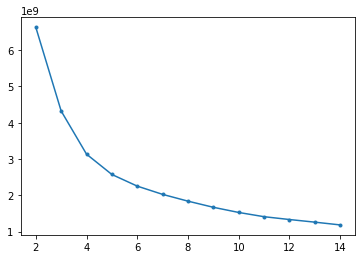

Silhouette predicted 4 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


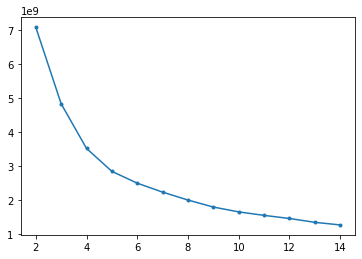

Silhouette predicted 4 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


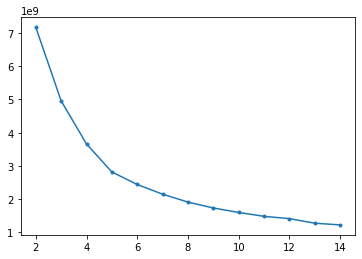

Silhouette predicted 5 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


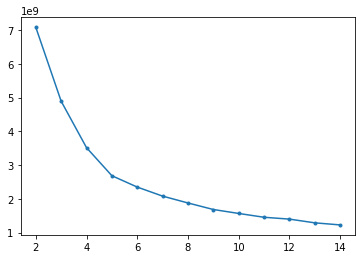

Silhouette predicted 2 clusters. Please enter elbow results:
5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


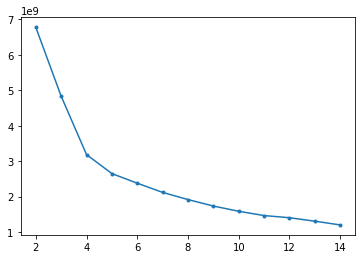

Silhouette predicted 4 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4
finding clusters


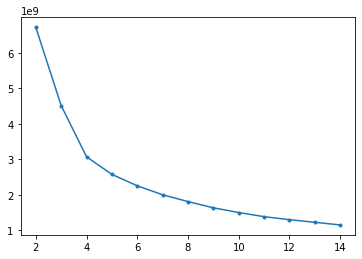

Silhouette predicted 4 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


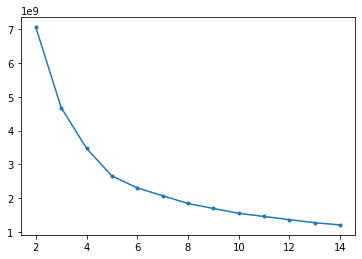

Silhouette predicted 3 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


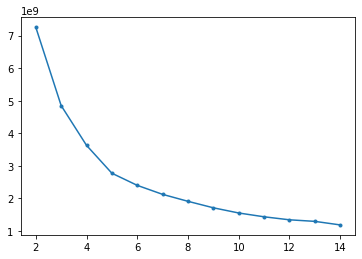

Silhouette predicted 5 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


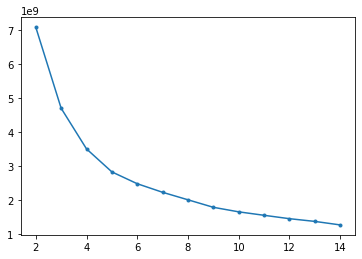

Silhouette predicted 3 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


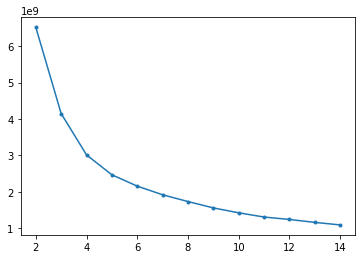

Silhouette predicted 4 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 3


In [21]:
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train, test in skf.split(feat_risk, lab_risk):
  test_labels = []

  #Retrieve the predicted amount of clusters and the best performing KMeans model
  n_clusters, final_model = utils.Utils.cluster_and_model(feat_risk[train], lab_risk[train])

  #Retrieve the clusters containing missclassified data and the indices of these clusters in the training data
  missclassified_cluster_data_index, missclassified_clusters = utils.Utils.find_missclassified_clusters(n_clusters, lab_risk[train], final_model.labels_)
  rf_classifiers = [0]*n_clusters
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_risk[train]
    f1 = f[missclassified_cluster_data_index[i], :]
    l  = lab_risk[train]
    l1 = np.take(l, missclassified_cluster_data_index[i])
    rf_classifiers[i] = random_forest_clf.fit(f1, l1)
  
  #For each point in test dataset, give it a cluster
  for x in feat_risk[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction[0] in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  accuracy_scores.append(accuracy_score(test_labels, lab_risk[test]))
  precision_scores.append(precision_score(test_labels, lab_risk[test]))
  recall_scores.append(recall_score(test_labels, lab_risk[test]))
  f1_scores.append(f1_score(test_labels, lab_risk[test]))

EVALUATING RESULTS FROM PROPOSED ALGORITHM

In [32]:
print("Accuracy:", np.mean(accuracy_scores), "+/-", np.std(accuracy_scores))
print("Precision:", np.mean(precision_scores), "+/-", np.std(precision_scores))
print("Recall:", np.mean(recall_scores), "+/-", np.std(recall_scores))
print("F1-Score:", np.mean(f1_scores), "+/-", np.std(f1_scores))

Accuracy: 0.8151487624294281 +/- 0.0027188991405050576
Precision: 0.004790590935169248 +/- 0.009581396584798372
Recall: 0.09166666666666666 +/- 0.2056493779875511
F1-Score: 0.008993305545029683 +/- 0.017992287069590995


APPLYING SMOTE SAMPLING

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

In [29]:
smote_feat, smote_lab = sm.fit_resample(feat_risk, lab_risk)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


EVALUATING RESULTS FROM SMOTE

In [30]:
#Evaluate using decision tree
evaluatePerformance(tree_clf, smote_feat, smote_lab)

Accuracy: 0.635183412727226 +/- 0.19725762469886368
Precision: 0.5960466651726961 +/- 0.16879491517924403
Recall: 0.8038394492053029 +/- 0.2744646786909406
F1-Score: 0.6744842870208287 +/- 0.2080087992180449


In [31]:
#Evaluate using random forest
evaluatePerformance(rf_clf, smote_feat, smote_lab)

Accuracy: 0.635183412727226 +/- 0.19725762469886368
Precision: 0.5960466651726961 +/- 0.16879491517924403
Recall: 0.8038394492053029 +/- 0.2744646786909406
F1-Score: 0.6744842870208287 +/- 0.2080087992180449
